In [2]:
import os

## 2.1 usa.gov 데이터

In [5]:
경로 = 'data/pydata-book/usagov_bitly_data2012-03-16-1331923249.txt'

In [27]:
파일 = open(경로, encoding='UTF-8')
파일

<_io.TextIOWrapper name='data/pydata-book/usagov_bitly_data2012-03-16-1331923249.txt' mode='r' encoding='UTF-8'>

In [28]:
파일.readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

1. 각 줄을 JSON 형식으로 해독
1. 결과 객체를 리스트에 추가

In [29]:
import json

In [83]:
records = [json.loads(line) for line in open(경로, encoding='UTF-8')]
len(records)

3560

### Timezone 집계

In [45]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
len(time_zones)

3440

In [49]:
from collections import defaultdict
def get_counts(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

In [55]:
counts = get_counts(time_zones)
len(counts)

97

In [57]:
import pandas as pd

In [62]:
frame = pd.DataFrame(records)
len(frame)

3560

In [63]:
frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [64]:
frame[:5]

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [71]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

#### 연습
cy 열은 도시 정보를 담고있습니다. 접속 사용자의 도시 도수 집계를 수행합니다

In [73]:
frame['cy'].value_counts()[:10]

Provo           121
White Plains    104
Washington       98
Palo Alto        68
Shrewsbury       46
Acworth          38
Dallas           33
Paramus          32
Nogata           29
Los Angeles      28
Name: cy, dtype: int64

In [91]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [92]:
%matplotlib inline

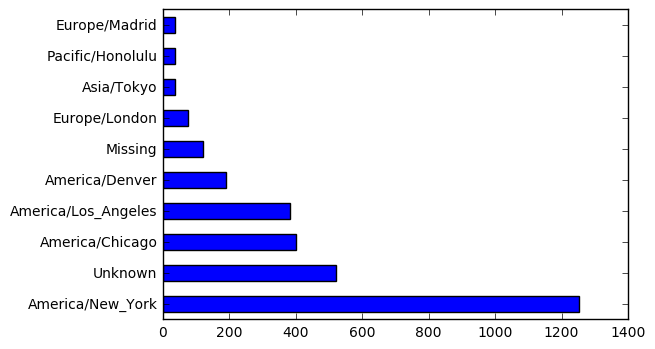

In [95]:
tz_counts[:10].plot(kind='barh')

운영체제와 브라우저 정보 분석

In [100]:
browsers = frame['a'].dropna().str.split().str[0]

In [108]:
browsers.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: a, dtype: int64

운영체제 정보 추출

In [112]:
cframe = frame[frame.a.notnull()]

In [113]:
윈도우인가 = cframe['a'].str.contains('Windows')
윈도우인가[:10]

0     True
1    False
2     True
3    False
4     True
5     True
6     True
7     True
8    False
9     True
Name: a, dtype: bool

In [118]:
operating_system = 윈도우인가.replace({True: 'Windows', False: 'Not Windows'})
operating_system[:8]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
5        Windows
6        Windows
7        Windows
Name: a, dtype: object

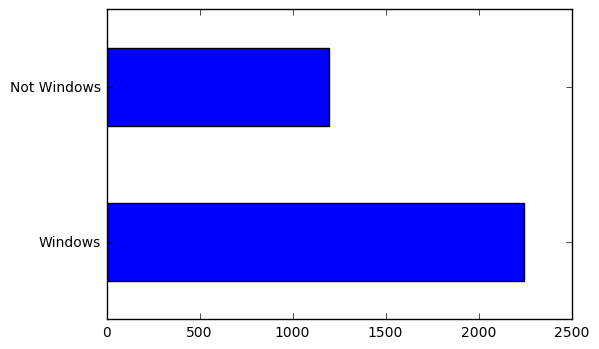

In [120]:
operating_system.value_counts().plot(kind='barh')

표준시간대별 운영체제별 분류

In [121]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [124]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:8]

a,Not Windows,Windows
tz,,
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [129]:
top10 = agg_counts.sum(axis=1).sort_values(ascending=False)[:10]
count_subset = agg_counts.ix[top10.index]

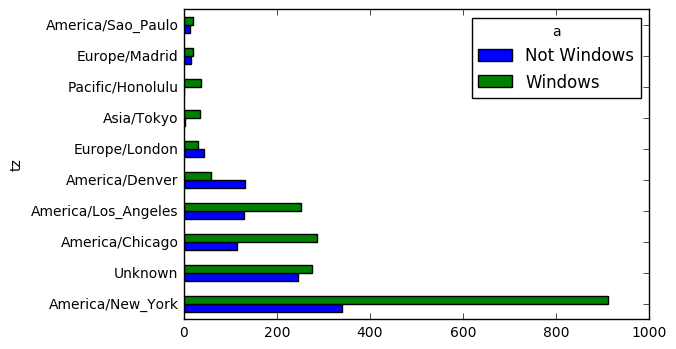

In [130]:
count_subset.plot(kind='barh')